This is still in Julia so just ignore it. It's my (Grace's) solution to Alia's ODE.

# 1 Parameter ODE Challenge

In [ ]:
# Imports
using Plots
using Printf
using DataFrames
using CSV
using DifferentialEquations

### The ODE

Hey folks! Here's my first ODE parameter challenge to you both. For my ODE, I've chosen a version of the Duffing equation, which is of the form:


$$\ddot{x} = -\varepsilon x - \varepsilon x^3$$

This equation models a non-linear oscillator.

Here $\varepsilon$ is the parameter that you are challenged to figure out my choice of.



### The Data

Along with this Julia notebook, I've also provided a csv file (`duffing_oscillator_data.csv`) of a particular trajectory of this ODE. To read in the data, change the string in line 2 of the cell below to whatever your path is to the csv and then run the cell.

In [9]:
# Read in the data
data = CSV.read("/Users/gracerojo/Downloads/duffing_oscillator_data.csv", DataFrame) # change the string to whatever the path to duffing_oscillator_data.csv is for you

# Unpack data into more readable variables
t = data[!,1]
x = data[!,3]
print()

To get a look at this data, you can plot it:

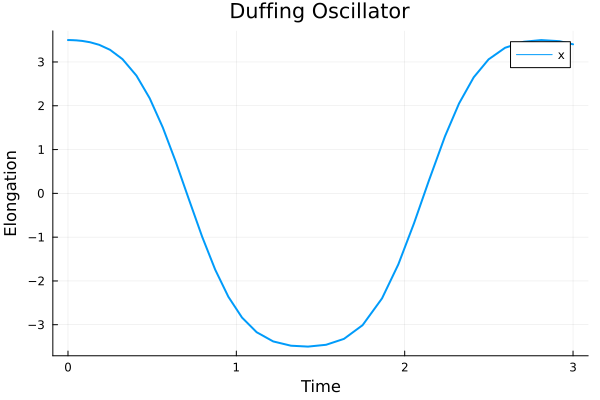

In [7]:
plot(t,x, linewidth = 2, title = "Duffing Oscillator",
     xaxis = "Time", yaxis = "Elongation", label = "x")

If you'd rather work in python, you should be able to read in the data in a similar manner with the Pandas package, with something like this:


```
import pandas as pd

data = pd.read_csv("duffing_oscillator_data.csv")

t = data["timestamp"]
x = data["value2"]


```

Now I leave it to you all to find my choice of $\varepsilon$!

-Alia

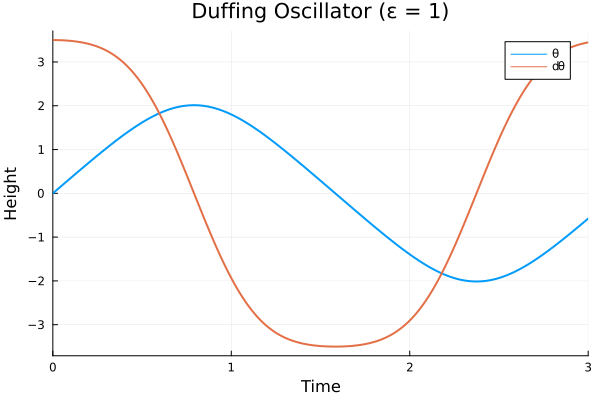

In [35]:
#Constants
ε = 1

#Initial Conditions
u₀ = [0.0, 3.5]
tspan = (0.0, 3.0)

#Define the problem
function duffingoscillator(du, u, p, t)
    x = u[1]
    dx = u[2]
    du[1] = dx
    du[2] = - ε*x - ε*x^3
end

#Pass to solvers
prob = ODEProblem(duffingoscillator, u₀, tspan)
sol = solve(prob, Tsit5())

#Plot
plot(sol, linewidth = 2, title = "Duffing Oscillator (ε = 1)", xaxis = "Time",
     yaxis = "Height", label = ["\\theta" "d\\theta"])

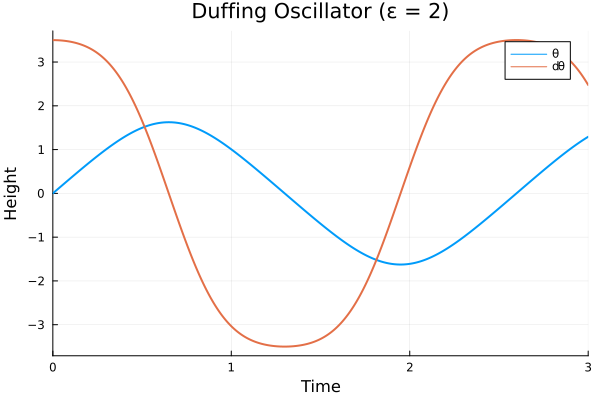

In [36]:
#Constants
ε = 2


#Initial Conditions
u₀ = [0.0, 3.5]
tspan = (0.0, 3.0)

#Define the problem
function duffingoscillator(du, u, p, t)
    x = u[1]
    dx = u[2]
    du[1] = dx
    du[2] = - ε*x - ε*x^3
end

#Pass to solvers
prob = ODEProblem(duffingoscillator, u₀, tspan)
sol = solve(prob, Tsit5())

#Plot
plot(sol, linewidth = 2, title = "Duffing Oscillator (ε = 2)", xaxis = "Time",
     yaxis = "Height", label = ["\\theta" "d\\theta"])

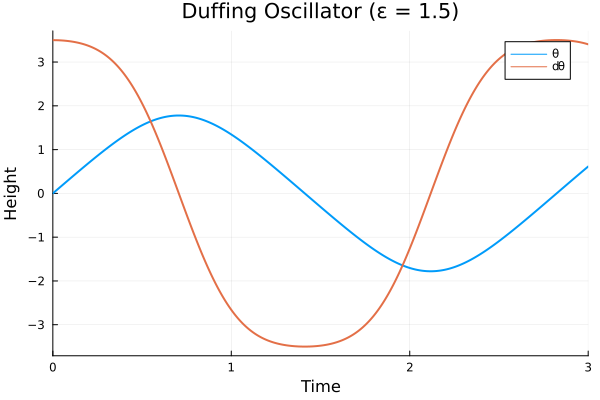

In [37]:
#Constants
ε = 1.5


#Initial Conditions
u₀ = [0.0, 3.5]
tspan = (0.0, 3.0)

#Define the problem
function duffingoscillator(du, u, p, t)
    x = u[1]
    dx = u[2]
    du[1] = dx
    du[2] = - ε*x - ε*x^3
end

#Pass to solvers
prob = ODEProblem(duffingoscillator, u₀, tspan)
sol = solve(prob, Tsit5())

#Plot
plot(sol, linewidth = 2, title = "Duffing Oscillator (ε = 1.5)", xaxis = "Time",
     yaxis = "Height", label = ["\\theta" "d\\theta"])

Luckily enough, 1.5 ended up being the next $\varepsilon$ I tried, and then I printed out the values that this gave (below) and checked that it corresponded to Alia's data.

In [33]:
df = DataFrame(sol)
CSV.write("/Users/gracerojo/Downloads/DiffEqThings/alia1_challenge.csv", df)
print()